# Tarjeta de datos 2

<hr style="border: none; border-top: 2px solid #ccc;" />

### Hipótesis 2: "Existe una relación entre el porcentaje de viviendas de bajo consumo o esporádicas, de viviendas de consumo medio y de viviendas de alto consumo de una provincia y su tendencia a adoptar dispositivos de energía renovable"

Las viviendas de bajo consumo o esporádicas suelen corresponder a residencias secundarias, utilizadas principalmente durante periodos vacacionales o de forma ocasional. Debido a esto, las provincias con mayor porcentaje de este tipo de residencias suelen tener menor tendencia a adquirir dispositivos de energías renovables debido al poco tiempo que sus propietarios pasan en ellas.

Por otro lado, en las viviendas de alto consumo, sus propietarios suelen tener un poder adquisitivo mayor, y generalmente, prefieren contratar la electricidad a lidiar con los posibles problemas técnicos de este tipo de instalaciones.

Por último, las viviendas de consumo medio representan un equilibrio entre los costes y beneficios de las energías renovables. Por ello, la instalación de dispositivos de energía renovable puede ser una opción atractiva para los propietarios, ya que permite reducir gastos energéticos de manera significativa a medio y largo plazo.

<hr style="border: none; border-top: 1px solid #ccc;" />

### Preparación del entorno

In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt

SILVER_DATA_PATH = os.path.join("..", "..", "data", "silver")
GOLD_DATA_PATH = os.path.join("..", "..", "data", "gold")

<hr style="border: none; border-top: 1px solid #ccc;" />

### Definición de datos y estructura de la tarjeta de datos

Para esta segunda hipótesis, se quiere realizar una triple comparación entre cada uno de los tres grupos según la intensidad de uso eléctrico. Estos grupos son los siguientes:

- **<u>Viviendas de bajo consumo</u>**: Pertenecerán a este grupo todas las viviendas con consumo mayor a **0 kwh** (para evitar contabilizar las viviendas vacías) y menor o igual a **750 kwh**.

- **<u>Viviendas de consumo medio</u>**: Este grupo está compuesto por todas aquellas viviendas cuyo consumo eléctrico se sitúa entre **1001 kwh** y **4000 kwh**.

- **<u>Viviendas de alto consumo</u>**: Se considerán viviendas de alto consumo aquellas que superen un umbral de consumo de **6000 kwh**.

En cuanto a la creación de la tarjeta de datos, se utilizarán datasets previamente preprocesados y almacenados en la capa silver. Estos conjuntos de datos contienen información relacionada con la intensidad de uso en viviendas y el uso de dispositivos renovables, desglosada por provincias de España.

Además, se realizarán una serie de transformaciones con los datos disponibles para crear un dataset para esta segunda hipótesis. Este dataset estará listo pra ser utilizado directamente en los modelos de machine learning que se emplearán, sin necesidad de realizar transformaciones adicionales. 

La estructura de la tarjeta de datos es la siguiente:

<table style="border-collapse: collapse; width: 100%; text-align: center;">
  <thead>
    <tr style="background-color: #c7e7c1; color: #000;">
      <th style="border: 1px solid #8bc48a; padding: 8px;">Provincia</th>
      <th style="border: 1px solid #8bc48a; padding: 8px;">Índice de Viviendas de Bajo Consumo</th>
      <th style="border: 1px solid #8bc48a; padding: 8px;">Índice de Viviendas de Consumo Medio</th>
      <th style="border: 1px solid #8bc48a; padding: 8px;">Índice de Viviendas de Alto Consumo</th>
      <th style="border: 1px solid #8bc48a; padding: 8px;">Índice de Viviendas con Dispositivos Renovables</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #eaf7e6; color: #111">
      <td style="border: 1px solid #8bc48a; padding: 8px;">Albacete</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
    </tr>
    <tr style="background-color: #dff4dc;color: #111"">
      <td style="border: 1px solid #8bc48a; padding: 8px;">Alicante/Alacant</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
    </tr>
    <tr style="background-color: #eaf7e6;color: #111"">
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
      <td style="border: 1px solid #8bc48a; padding: 8px;">~</td>
    </tr>
  </tbody>
</table>


<hr style="border: none; border-top: 1px solid #ccc;" />

### Datos

Inicialmente, se cargan los datasets que se utilizarán para esta tarjeta de datos.

In [22]:
# Dispositivos de energía renovable
dispositivos_renovables_df = pd.read_csv(os.path.join(SILVER_DATA_PATH, "dispositivos_renovable.csv"), sep=";", encoding="latin")
dispositivos_renovables_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Provincias                                   470 non-null    object
 1   Ingresos netos                               470 non-null    object
 2   Dispone de dispositivo de energía renovable  470 non-null    object
 3   Total                                        470 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 14.8+ KB


In [23]:
# Intensidad de uso en viviendas
intensidad_uso_viviendas_df = pd.read_csv(os.path.join(SILVER_DATA_PATH, "intensidad_de_uso_en_viviendas.csv"), sep=";", encoding="latin")
intensidad_uso_viviendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Provincias         846 non-null    object
 1   Consumo eléctrico  846 non-null    object
 2   Total              846 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 20.0+ KB


<hr style="border: none; border-top: 1px solid #ccc;" />

### Procesamiento

En esta fase, se realizarán las modificaciones y transformaciones necesarias para obtener datos útiles para la tarjeta de datos. Este proceso incluirá la limpieza, la reestructuración y la integración de los datos, asegurando que puedan ser utilizados en fases posteriores.

#### dispositivos_renovables_df

Del dataset `dispositivos_renovable.csv` queremos obtener información sobre el índice de viviendas que tienen al menos algún dispositivo de energía renovable por provincia. Para ello, se deberán realizar los siguientes pasos:

- Eliminar la columna `Ingresos netos`, ya que, para esta hipótesis no nos aporta ninguna información útil.

- Agrupar los registros del dataframe por las columnas `Provincias` y `Dispone de dispositivo de energía renovable` y sumar todos los valores de cada uno de los registros fusionados.

- Para cada provincia, calcular el número total de viviendas mediante la suma de las que no tienen ningún dispositivo de energía renovable y las que si disponen de alguno.

- Calcular el índice de viviendas que tienen algún dispositivo de energía renovable para cada provincia de España.

In [24]:
# Paso 1: Eliminar la columna "Ingresos netos"
dispositivos_renovables_df.drop(columns=["Ingresos netos"], inplace=True)
dispositivos_renovables_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Provincias                                   470 non-null    object
 1   Dispone de dispositivo de energía renovable  470 non-null    object
 2   Total                                        470 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.1+ KB


In [25]:
# Paso 2: Agrupar los registros del dataframe por las columnas "Provincias" y 
# "Dispone de dispositivo de energía renovable" y sumar todos los valores de 
# cada uno de los registros fusionados.
dispositivos_renovables_df = dispositivos_renovables_df.groupby(["Provincias", "Dispone de dispositivo de energía renovable"]).sum()
dispositivos_renovables_df.reset_index(inplace=True)
dispositivos_renovables_df.head()

,Provincias,Dispone de dispositivo de energía renovable,Total
0,Albacete,No,146255
1,Albacete,Si,6594
2,Alicante/Alacant,No,735245
3,Alicante/Alacant,Si,30923
4,Almería,No,248102


In [26]:
# Paso 3: Para cada provincia, calcular el número total de viviendas mediante 
# la suma de las que no tienen ningún dispositivo de energía renovable y las 
# que si disponen de alguno.

# Obtener todos los valores unique de la columna `Provincias`
provincias = dispositivos_renovables_df["Provincias"].unique()

# Para cada provincia, calcular el número total de viviendas mediante la suma
viviendas_list = []
for provincia in provincias:
    viviendas = dispositivos_renovables_df[dispositivos_renovables_df["Provincias"] == provincia].sum()
    # Añadir al listado la provincia y el número total de viviendas
    viviendas_list.append({"Provincias": provincia, "Viviendas": viviendas["Total"]})

# Convertir el listado a un dataframe
viviendas_df = pd.DataFrame(viviendas_list)
viviendas_df.head()

,Provincias,Viviendas
0,Albacete,152849
1,Alicante/Alacant,766168
2,Almería,265958
3,Araba/Álava,141124
4,Asturias,454449


In [27]:
dispositivos_renovables_df.head()

,Provincias,Dispone de dispositivo de energía renovable,Total
0,Albacete,No,146255
1,Albacete,Si,6594
2,Alicante/Alacant,No,735245
3,Alicante/Alacant,Si,30923
4,Almería,No,248102


In [28]:
# Paso 4: Calcular el índice de viviendas que tienen algún dispositivo de 
# energía renovable para cada provincia de España.

indice_viviendas_renovables_list = []
for provincia in provincias:
    viviendas_renovables = dispositivos_renovables_df[(dispositivos_renovables_df["Provincias"] == provincia) & (dispositivos_renovables_df["Dispone de dispositivo de energía renovable"] == "Si")].sum()
    viviendas_totales = viviendas_df[viviendas_df["Provincias"] == provincia]["Viviendas"].values[0]
    indice_viviendas_renovables = (viviendas_renovables["Total"] / viviendas_totales) * 100
    indice_viviendas_renovables_list.append({"Provincias": provincia, "Indice de viviendas renovables": indice_viviendas_renovables})

# Convertir el listado a un dataframe
indice_viviendas_renovables_df = pd.DataFrame(indice_viviendas_renovables_list)
indice_viviendas_renovables_df.head()

,Provincias,Indice de viviendas renovables
0,Albacete,4.314062
1,Alicante/Alacant,4.036060
2,Almería,6.713842
3,Araba/Álava,10.445424
4,Asturias,5.031368


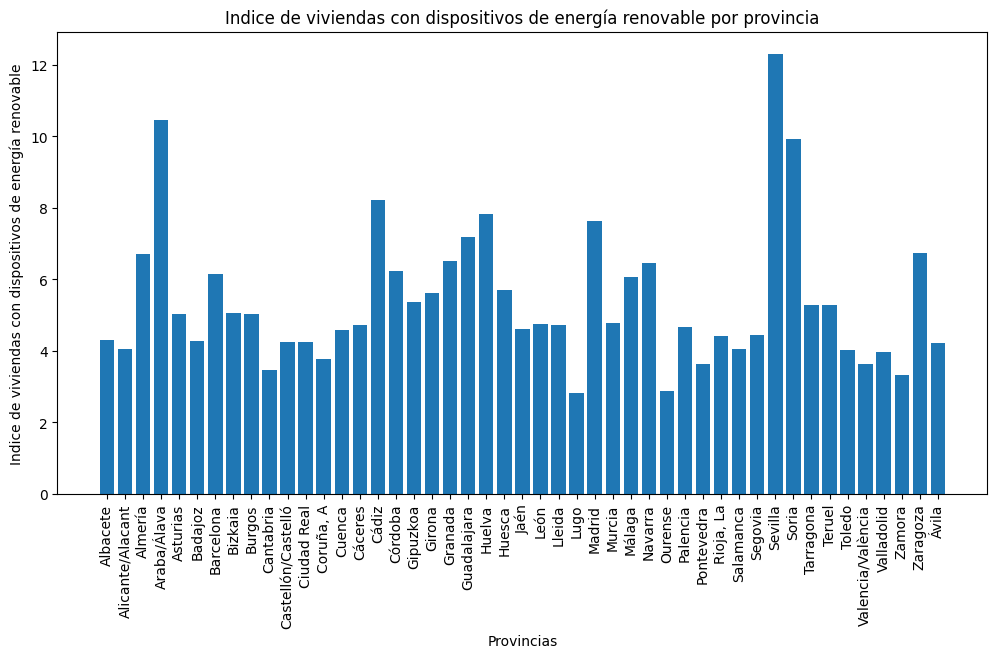

In [29]:
# Mostrar los datos en un histograma
plt.figure(figsize=(12, 6))
plt.bar(indice_viviendas_renovables_df["Provincias"], indice_viviendas_renovables_df["Indice de viviendas renovables"])
plt.xticks(rotation=90)
plt.title("Indice de viviendas con dispositivos de energía renovable por provincia")
plt.xlabel("Provincias")
plt.ylabel("Indice de viviendas con dispositivos de energía renovable")
plt.show()

<hr style="border: none; border-top: 1px solid #ccc;" />

#### intensidad_uso_viviendas_df

Del dataset `intensidad_de_uso_en_viviendas.csv` queremos obtener información sobre el índice de viviendas de bajo consumo, de consumo medio y de alto consumo por provincia. Los pasos a realizar son los siguientes:

- Agrupar los registros del dataframe, según su valor en la columna `Consumo eléctrico`, en tres grupos y sumando sus valores: 
    - **Grupo 1**: *Viviendas con bajo consumo* y *Viviendas de uso esporádico*.

    - **Grupo 2**: *Viviendas con cosumo entre 1.001 y 2.000 kwh*, *Viviendas con cosumo entre 2.001 y 3.000 kwh* y *Viviendas con cosumo entre 3.001 y 4.000 kwh*
    
    - **Grupo 3**: *Viviendas con cosumo entre 6.001 y 7.000 kwh*, *Viviendas con cosumo entre 7.001 y 8.000 kwh*, *Viviendas con cosumo entre 8.001 y 9.000 kwh*, *Viviendas con cosumo entre 9.001 y 10.000 kwh* y *Viviendas con consumo mayor de 10.000 kwh*

- Eliminar de la columna `Consumo eléctrico` todos los registros con valor distinto a `Bajo consumo`, `Medio consumo`, `Alto consumo` y `Viviendas totales`.

- Agrupar los registros con mismo valor en la columna `Consumo eléctrico`.

- Para cada provincia, calcular el índice de viviendas pertenecientes a cada uno de los grupos a partir de el número de viviendas de cada uno de ellos y las viviendas totales.

In [30]:
# Paso 1: Agrupar los registros del dataframe, según su valor en la columna
#  `Consumo eléctrico`, en tres grupos y sumando sus valores
grupos_dict = {
    "Bajo consumo": ["Viviendas con bajo consumo", 
                     "Viviendas de uso esporádico"],

    "Medio consumo": ["Viviendas con cosumo entre 1.001 y 2.000 kwh", 
                      "Viviendas con cosumo entre 2.001 y 3.000 kwh", 
                      "Viviendas con cosumo entre 3.001 y 4.000 kwh"],   

    "Alto consumo": ["Viviendas con cosumo entre 6.001 y 7.000 kwh",
                     "Viviendas con cosumo entre 7.001 y 8.000 kwh", 
                     "Viviendas con cosumo entre 8.001 y 9.000 kwh", 
                     "Viviendas con cosumo entre 9.001 y 10.000 kwh",
                     "Viviendas con consumo mayor a 10.000 kwh"]
}

# Remplazar valores de la columna `Consumo eléctrico` por los valores de los 
# grupos definidos en el diccionario `grupos_dict`
for grupo, valores in grupos_dict.items():
    intensidad_uso_viviendas_df["Consumo eléctrico"].replace(valores, grupo, inplace=True)

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_19320\1581825570.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  intensidad_uso_viviendas_df["Consumo eléctrico"].replace(valores, grupo, inplace=True)


In [31]:
intensidad_uso_viviendas_df.head(18)

,Provincias,Consumo eléctrico,Total
0,Almería,Viviendas totales,433763
1,Almería,Viviendas vacías,73028
2,Almería,Mediana consumo anual,2333
3,Almería,Bajo consumo,16125
4,Almería,Bajo consumo,45695
5,Almería,Viviendas de uso esporádico (entre 251 y 500 kwh),23258
6,Almería,Viviendas de uso esporádico (entre 501 y 750 kwh),22437
7,Almería,Viviendas con cosumo entre 751 y 1.000 kwh,21075
8,Almería,Medio consumo,80183
9,Almería,Medio consumo,71363


In [32]:
# Paso 2: Eliminar de la columna "Consumo eléctrico" todos los registros con 
# valor distinto a "Bajo consumo", "Medio consumo", "Alto consumo" y 
# "Viviendas totales".

valores_validos = ["Bajo consumo", "Medio consumo", "Alto consumo", "Viviendas totales"]
intensidad_uso_viviendas_df = intensidad_uso_viviendas_df[intensidad_uso_viviendas_df["Consumo eléctrico"].isin(valores_validos)]
intensidad_uso_viviendas_df.head(10)

,Provincias,Consumo eléctrico,Total
0,Almería,Viviendas totales,433763
3,Almería,Bajo consumo,16125
4,Almería,Bajo consumo,45695
8,Almería,Medio consumo,80183
9,Almería,Medio consumo,71363
10,Almería,Medio consumo,52873
13,Almería,Alto consumo,9271
14,Almería,Alto consumo,4862
15,Almería,Alto consumo,2718
16,Almería,Alto consumo,1712


In [33]:
# Paso 3: Agrupar los registros con mismo valor en la columna 
# "Consumo eléctrico" y "Provincias".
intensidad_uso_viviendas_df = intensidad_uso_viviendas_df.groupby(["Provincias", "Consumo eléctrico"]).sum()
intensidad_uso_viviendas_df.reset_index(inplace=True)
intensidad_uso_viviendas_df.head(10)

,Provincias,Consumo eléctrico,Total
0,Albacete,Alto consumo,8229
1,Albacete,Bajo consumo,39709
2,Albacete,Medio consumo,119587
3,Albacete,Viviendas totales,241313
4,Alicante/Alacant,Alto consumo,54592
5,Alicante/Alacant,Bajo consumo,233755
6,Alicante/Alacant,Medio consumo,632736
7,Alicante/Alacant,Viviendas totales,1350006
8,Almería,Alto consumo,18563
9,Almería,Bajo consumo,61820


In [34]:
# Paso 4: Para cada provincia, calcular el índice de viviendas pertenecientes
# a cada uno de los grupos a partir de el número de viviendas de cada uno de
# ellos y las viviendas totales.

provincias = intensidad_uso_viviendas_df["Provincias"].unique()
indice_viviendas_intensidad_uso_list = []

for provincia in provincias:
    # Viviendas totales buscar registro con valor "Viviendas totales"
    viviendas_totales = intensidad_uso_viviendas_df[(intensidad_uso_viviendas_df["Provincias"] == provincia) 
                                                    & (intensidad_uso_viviendas_df["Consumo eléctrico"] == "Viviendas totales")].sum()["Total"]
    indice_tipo_vivienda = []
    tipo_vivienda = ["Bajo consumo", "Medio consumo", "Alto consumo"]

    # Para cada tipo de vivienda, calcular su índice
    for tipo in tipo_vivienda:
        viviendas_tipo = intensidad_uso_viviendas_df[(intensidad_uso_viviendas_df["Provincias"] == provincia) 
                                                     & (intensidad_uso_viviendas_df["Consumo eléctrico"] == tipo)].sum()["Total"]
        indice = (viviendas_tipo / viviendas_totales) * 100
        indice_tipo_vivienda.append(indice)

    # Añadir a la lista de indices de viviendas
    indice_viviendas_intensidad_uso_list.append({"Provincias": provincia, 
                                                 "Indice de viviendas bajo consumo": indice_tipo_vivienda[0],
                                                 "Indice de viviendas medio consumo": indice_tipo_vivienda[1],
                                                 "Indice de viviendas alto consumo": indice_tipo_vivienda[2]})
    
# Convertir la lista en un dataframe
indice_viviendas_intensidad_uso_df = pd.DataFrame(indice_viviendas_intensidad_uso_list)

In [35]:
indice_viviendas_intensidad_uso_df.head()

,Provincias,Indice de viviendas bajo consumo,Indice de viviendas medio consumo,Indice de viviendas alto consumo
0,Albacete,16.455392,49.556800,3.410094
1,Alicante/Alacant,17.315108,46.869125,4.043834
2,Almería,14.252022,47.126887,4.279526
3,Araba/Álava,14.195114,65.471842,1.313018
4,Asturias,15.586008,52.933971,2.967485


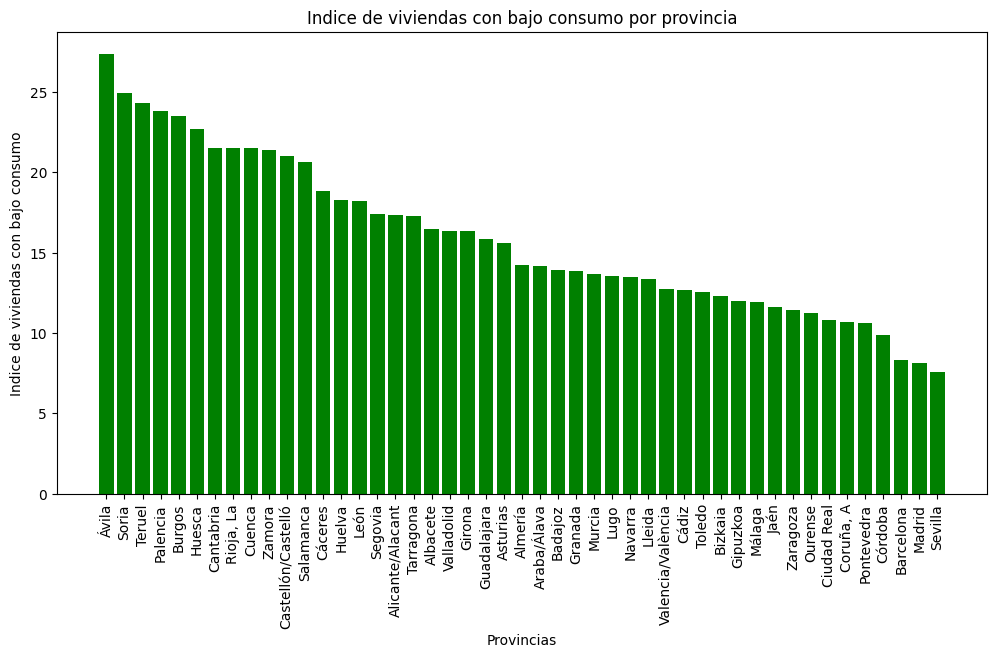

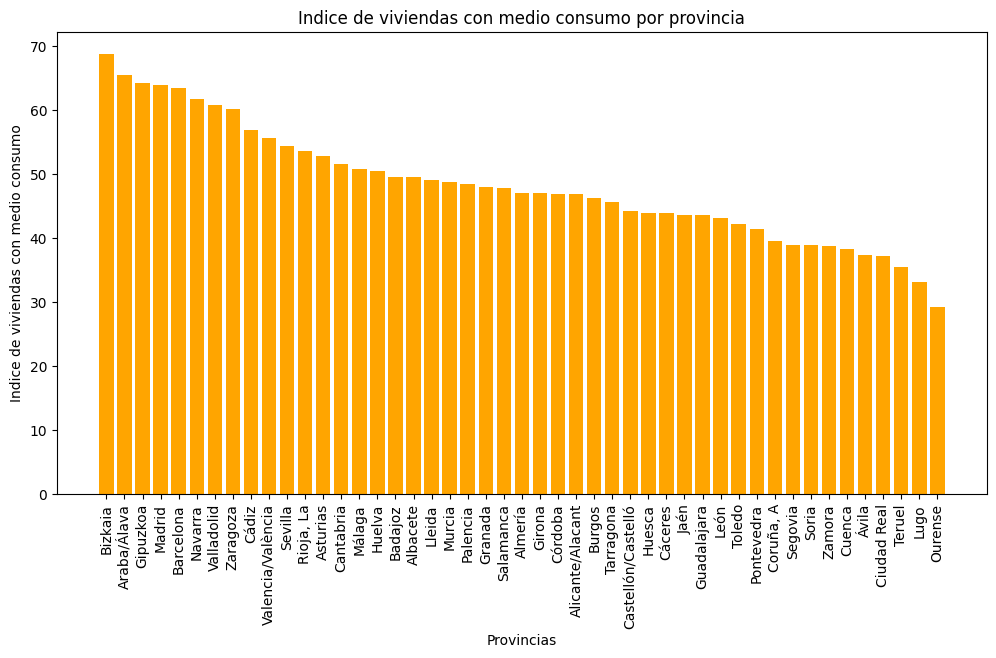

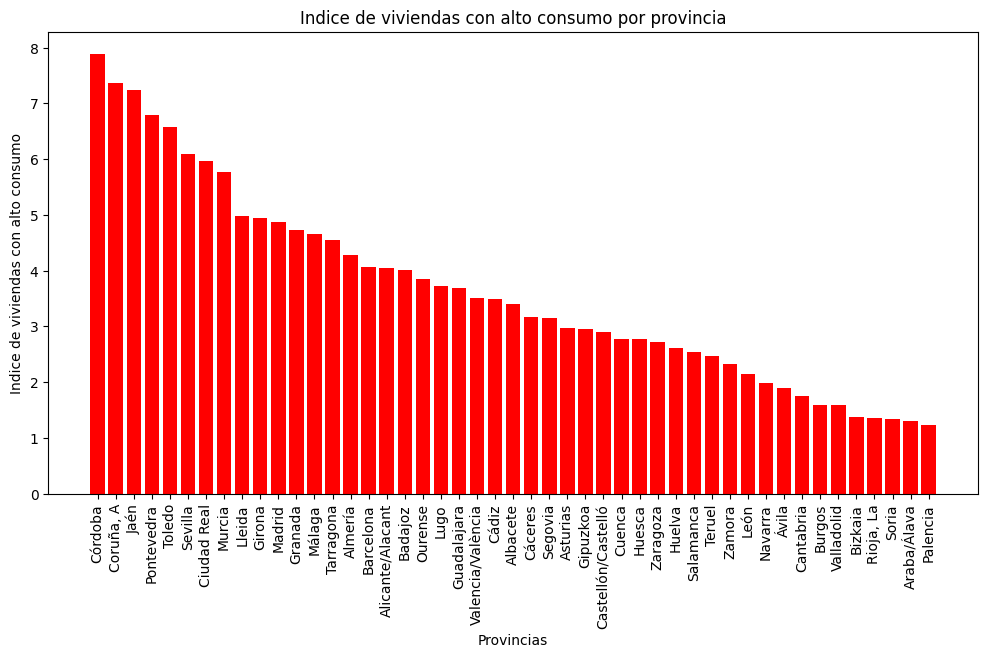

In [36]:
# Mostrar los datos en un histograma

# Viviendas de bajo consumo

# Ordenar los valores por el índice de viviendas de bajo consumo
indice_viviendas_intensidad_uso_df = indice_viviendas_intensidad_uso_df.sort_values(by="Indice de viviendas bajo consumo", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(indice_viviendas_intensidad_uso_df["Provincias"], indice_viviendas_intensidad_uso_df["Indice de viviendas bajo consumo"], color="green")
plt.xticks(rotation=90)
plt.title("Indice de viviendas con bajo consumo por provincia")
plt.xlabel("Provincias")
plt.ylabel("Indice de viviendas con bajo consumo")
plt.show()

# Viviendas de medio consumo

# Ordenar los valores por el índice de viviendas de medio consumo
indice_viviendas_intensidad_uso_df = indice_viviendas_intensidad_uso_df.sort_values(by="Indice de viviendas medio consumo", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(indice_viviendas_intensidad_uso_df["Provincias"], indice_viviendas_intensidad_uso_df["Indice de viviendas medio consumo"], color="orange")
plt.xticks(rotation=90)
plt.title("Indice de viviendas con medio consumo por provincia")
plt.xlabel("Provincias")
plt.ylabel("Indice de viviendas con medio consumo")
plt.show()

# Viviendas de alto consumo

# Ordenar los valores por el índice de viviendas de alto consumo
indice_viviendas_intensidad_uso_df = indice_viviendas_intensidad_uso_df.sort_values(by="Indice de viviendas alto consumo", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(indice_viviendas_intensidad_uso_df["Provincias"], indice_viviendas_intensidad_uso_df["Indice de viviendas alto consumo"], color="red")
plt.xticks(rotation=90)
plt.title("Indice de viviendas con alto consumo por provincia")
plt.xlabel("Provincias")
plt.ylabel("Indice de viviendas con alto consumo")
plt.show()

### Resultado

A continuación, unimos los datos en un único dataframe para obtener la tarjeta de datos de la hipótesis 2.

In [37]:
# Unir DataFrames
data_card_2_df = pd.merge(indice_viviendas_renovables_df, indice_viviendas_intensidad_uso_df, on="Provincias")

data_card_2_df.head()

,Provincias,Indice de viviendas renovables,Indice de viviendas bajo consumo,Indice de viviendas medio consumo,Indice de viviendas alto consumo
0,Albacete,4.314062,16.455392,49.556800,3.410094
1,Alicante/Alacant,4.036060,17.315108,46.869125,4.043834
2,Almería,6.713842,14.252022,47.126887,4.279526
3,Araba/Álava,10.445424,14.195114,65.471842,1.313018
4,Asturias,5.031368,15.586008,52.933971,2.967485


Se guardan los datos en el archivo `gold/data_card_2_df.csv`

In [38]:
with open(os.path.join(GOLD_DATA_PATH, "data_card_2_df.csv"), "w") as f:
    data_card_2_df.to_csv(f, sep=";", encoding="utf-8", index=False)

### Profiling de la tarjeta resultante

In [39]:
from ydata_profiling import ProfileReport

In [40]:
profile = ProfileReport(data_card_2_df, title="Data Card 2")
profile.to_file("../../profiling/data_card_2_profile_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 2115.13it/s]
